## Imports

In [2]:
from selenium import webdriver 
from selenium.webdriver.common.keys import Keys
import requests
from bs4 import BeautifulSoup 
import re
import pandas as pd 
import os 
import time
import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Introducing Selenium 

In [260]:
#mainpage = "https://www.equibase.com/static/chart/summary/SA041418USA-EQB.html"

#horselink = BeautifulSoup(requests.get(mainpage).text, "lxml")

#for a in horselink.find_all("a", text=re.compile('Blame the Rider')):
 #   print (a['href'])

In [261]:
#chromedriver1 = "/Users/vicky/Downloads/chromedriver" # path to the chromedriver executable
#chromedriver2 = os.environ["webdriver.chrome.driver"] 

#jesustakethewheel = webdriver.Chrome(chromedriver2)

In [267]:
#jesustakethewheel.get(mainpage)

## Horses of Interest Links

In [270]:
mainpage = "https://www.equibase.com/static/chart/summary/SA041418USA-EQB.html"
horselink = BeautifulSoup(requests.get(mainpage).text, "lxml")


In [274]:
horsenames = ['Blame the Rider','Majestic Eagle','Sellwood','Cajun Treasure','Friendly Outthedor','Pointed',
             'Dignitaire','Papa Joe','Tule Fog','Lymebyrd','Kings River King','California Journey','Raven Creek','Fast as Cass','Croissant','Lord Admiral',
             'Well Developed','Air Vice Marshal','Beach View','River Echo','Play Hard to Get','Cafe Flavor',
             'Unapologetic','Touched by Autism']

In [275]:
horselinkdic = {}

for horse in horsenames:
    for a in horselink.find_all("a", text=re.compile(horse)):
        for i in a:
            a = a['href']
            horselinkdic[horse]=a
            
#Aquaphobia's link was broken.              
horselinkdic['Aquaphobia']='http://www.equibase.com/profiles/Results.cfm?type=Horse&refno=9473199&registry=T&rbt=TB'

In [276]:
print((horselinkdic))

{'Blame the Rider': 'http://www.equibase.com/profiles/Results.cfm?type=Horse&refno=9892394&registry=T&rbt=TB', 'Majestic Eagle': 'http://www.equibase.com/profiles/Results.cfm?type=Horse&refno=9912045&registry=T&rbt=TB', 'Sellwood': 'http://www.equibase.com/profiles/Results.cfm?type=Horse&refno=9991558&registry=T&rbt=TB', 'Cajun Treasure': 'http://www.equibase.com/profiles/Results.cfm?type=Horse&refno=9882079&registry=T&rbt=TB', 'Friendly Outthedor': 'http://www.equibase.com/profiles/Results.cfm?type=Horse&refno=9674188&registry=T&rbt=TB', 'Pointed': 'http://www.equibase.com/profiles/Results.cfm?type=Horse&refno=9920793&registry=T&rbt=TB', 'Dignitaire': 'http://www.equibase.com/profiles/Results.cfm?type=Horse&refno=9893875&registry=T&rbt=TB', 'Papa Joe': 'http://www.equibase.com/profiles/Results.cfm?type=Horse&refno=9915285&registry=T&rbt=TB', 'Tule Fog': 'http://www.equibase.com/profiles/Results.cfm?type=Horse&refno=9686144&registry=T&rbt=TB', 'Lymebyrd': 'http://www.equibase.com/profi

## Scraping horsey stats

##### Scraping the stats table

In [277]:
chromedriver1 = "/Users/vicky/Downloads/chromedriver" # path to the chromedriver executable
chromedriver2 = os.environ["webdriver.chrome.driver"]

In [50]:
horseywinnings=[]
horseyworkouts=[]

for key, value in horselinkdic.items():   
    
    print(key) #So when it inevitably glitches in the middle I know which horse is giving me trouble. 
    jesustakethewheel = webdriver.Chrome(chromedriver2)
    jesustakethewheel.get(value)
    
    soupresults=BeautifulSoup(requests.get(value).text, "lxml")
    resultstable=soupresults.find_all(class_='table-hover')[1]

    rows=[row for row in resultstable.find_all('tr')]
    rows=rows[1:5]


    horseywins={}
    for row in rows:
        items=row.find_all('td')
        for entries in items:
            splitsies = entries.text.split(':')
            horseywins[splitsies[0]] = (splitsies[1])
            horseywins['Horse Name'] = (key)    
    
    
    horseywinnings.append(horseywins)
    
    time.sleep(1)
    
    python_button_Workouts = jesustakethewheel.find_element_by_id('Hworkouts') 
    python_button_Workouts.click() 

    python_button_seemore = jesustakethewheel.find_element_by_link_text('SEE MORE WORKOUTS')
    python_button_seemore.click()
    
    soupworkout=BeautifulSoup(jesustakethewheel.page_source, "lxml")
    
    workouttable=soupworkout.find(class_='resultTable') 

    #horseyworkouts=[]
    for row in workouttable.find_all('tr')[1:]:
        items=row.find_all('td')
        Track = items[0].text
        Date = items[1].text
        Course = items[2].text
        Distance = items[3].text
        if len(items[4].text) <6:
            tp = datetime.datetime.strptime(items[4].text,'%S.%f')
        else:
            tp = datetime.datetime.strptime(items[4].text,'%M:%S.%f')
        Time = tp.second*10+tp.minute*600+tp.microsecond//100000
        Note = items[5].text
        Rank = items[6].text
        rowdict= {'Horse Name': key,'Course' :Course,'Track' :Track,'Date':Date ,'Course' :Course ,'Distance' :Distance,'Time_tenths_second':Time,'Note':Note,'Rank':Rank}
        horseyworkouts.append(rowdict)
            
    time.sleep(1)

Blame the Rider
Majestic Eagle
Sellwood
Cajun Treasure
Friendly Outthedor
Pointed
Dignitaire
Papa Joe
Tule Fog
Lymebyrd
Kings River King
California Journey
Raven Creek
Fast as Cass
Croissant
Lord Admiral
Well Developed
Air Vice Marshal
Beach View
River Echo
Play Hard to Get
Cafe Flavor
Unapologetic
Touched by Autism
Aquaphobia


In [52]:
print(horseyworkouts)

[{'Horse Name': 'Blame the Rider', 'Course': 'Dirt', 'Track': ' Santa Anita', 'Date': '04/07/2018', 'Distance': '5F', 'Time_tenths_second': 618, 'Note': 'Handily', 'Rank': '\n18/39\n'}, {'Horse Name': 'Blame the Rider', 'Course': 'Dirt', 'Track': ' Santa Anita', 'Date': '03/31/2018', 'Distance': '5F', 'Time_tenths_second': 616, 'Note': 'Handily', 'Rank': '\n                                28/70 \n                            '}, {'Horse Name': 'Blame the Rider', 'Course': 'Dirt', 'Track': ' Santa Anita', 'Date': '03/24/2018', 'Distance': '4F', 'Time_tenths_second': 474, 'Note': 'Handily', 'Rank': '\n                                1/59 \n                            '}, {'Horse Name': 'Blame the Rider', 'Course': 'Dirt', 'Track': ' Santa Anita', 'Date': '03/01/2018', 'Distance': '4F', 'Time_tenths_second': 490, 'Note': 'Handily', 'Rank': '\n                                44/116 \n                            '}, {'Horse Name': 'Blame the Rider', 'Course': 'Dirt', 'Track': ' Santa Anita',

In [53]:
df_stats = pd.DataFrame(horseywinnings)
dfworkouts = pd.DataFrame(horseyworkouts)

In [68]:
df_stats.to_csv('stats_csv')
dfworkouts.to_csv('workouts_csv')

## Cleaning up dfworkouts

In [82]:
dfworkouts['Course'].unique()

array(['Dirt', 'Dirt training', 'Turf', 'Turf training',
       'All Weather Training'], dtype=object)

In [88]:
dfworkouts_clean = dfworkouts.drop('Note', axis=1 ).drop('Rank',axis=1).drop('Track',axis=1)
#new_df = df[df.C != 'XYZ']
#dfworkouts_clean = dfworkouts_clean.drop(dfworkouts_clean.loc[dfworkouts_clean['Course'] == 'Turf'])

In [89]:
dfworkouts_clean.head(2)

,Course,Date,Distance,Horse Name,Time_tenths_second
0,Dirt,04/07/2018,5F,Blame the Rider,618
1,Dirt,03/31/2018,5F,Blame the Rider,616


### GROUP BY TO AVERAGE

In [ ]:
dfworkouts_clean.groupby

## Cleaning up df_stats

In [90]:
df_stats

,Firsts,Horse Name,Seconds,Starts,Thirds
0,1,Blame the Rider,0,6,1
1,0,Majestic Eagle,3,5,0
2,0,Sellwood,1,3,2
3,0,Cajun Treasure,0,1,0
4,0,Friendly Outthedor,1,5,0
5,0,Pointed,0,6,0
6,0,Dignitaire,0,4,1
7,0,Papa Joe,0,2,0
8,2,Tule Fog,1,7,1
9,2,Lymebyrd,4,16,1


## Adding Race times and genders df

In [28]:
resultsofinterest = [
                    'http://tnetwork.trakus.com/tnet/t_SantaAnita.aspx?EventID=133974&Date=4/14/2018&Type=TBRED&Venue=4&DisplayType=1',
                    'http://tnetwork.trakus.com/tnet/t_SantaAnita.aspx?EventID=133976&Date=4/14/2018&Type=TBRED&Venue=4&DisplayType=1']

In [32]:
timesdic = [{'Horse Name' : 'Blame the Rider', 'Final_Time':'1:35.11','Gender': '0' },
           {'Horse Name' :'Majestic Eagle','Final_Time': '1:35.25','Gender': '0'},
           {'Horse Name' :'Sellwood','Final_Time': '1:35.39','Gender':'0'},
           {'Horse Name' :'Cajun Treasure','Final_Time': '1:35.39','Gender':'0'},
           {'Horse Name' :'Friendly Outthedor','Final_Time':'1:35.69','Gender':'0'},
           {'Horse Name' :'Pointed','Final_Time': '1:35.79','Gender':'0'},
           {'Horse Name' :'Dignitaire','Final_Time': '1:36.25','Gender':'0'},
           {'Horse Name' :'Papa Joe','Final_Time': '1:36.71','Gender':'0'},
           {'Horse Name' :'Tule Fog','Final_Time': '1:34.19','Gender':'0'},
           {'Horse Name' :'Lymebyrd','Final_Time': '1:34.83','Gender':'0'},
           {'Horse Name' :'Kings River King','Final_Time':'1:35.46','Gender':'0'},
           {'Horse Name' :'California Journey','Final_Time': '1:35.46','Gender':'0'},
           {'Horse Name' :'Raven Creek','Final_Time': '1:35.54','Gender':'0'},
           {'Horse Name' :'Fast as Cass','Final_Time':'1:36.17','Gender':'0'},
           {'Horse Name' :'Croissant','Final_Time': '1:36.50','Gender':'0'},
           {'Horse Name' :'Lord Admiral','Final_Time':'1:39.73', 'Gender':'0'},
           {'Horse Name' :'Aquaphobia','Final_Time': '1:33.86', 'Gender':'0'},
           {'Horse Name' :'Well Developed','Final_Time': '1:34.10','Gender':'0'},
           {'Horse Name' :'Air Vice Marshal','Final_Time':'1:34.12','Gender':'0'},
           {'Horse Name' :'Beach View','Final_Time': '1:34.56','Gender':'0'},
           {'Horse Name' :'River Echo','Final_Time': '1:34.71','Gender':'0'},
           {'Horse Name' :'Play Hard to Get','Final_Time':'1:34.75','Gender':'0'},
           {'Horse Name' :'Cafe Flavor','Final_Time': '1:35.06','Gender':'0'},
           {'Horse Name' :'Unapologetic','Final_Time':'1:35.30','Gender':'0'},
           {'Horse Name' :'Touched by Autism','Final_Time':'1:35.48','Gender':'0'}]


In [33]:
##This is right for hundreths??? Double check what you scraped!!!

for row in timesdic:
    for k,v in row.items():
        if k == 'Final_Time':
            timing = datetime.datetime.strptime(v,'%M:%S.%f')
            value = timing.second*100+timing.minute*6000+timing.microsecond//10000
        
    
    row['Final_Time_Hund'] = value 

print(timesdic)
    
    

[{'Horse Name': 'Blame the Rider', 'Final_Time': '1:35.11', 'Gender': '0', 'Final_Time_Hund': 9511}, {'Horse Name': 'Majestic Eagle', 'Final_Time': '1:35.25', 'Gender': '0', 'Final_Time_Hund': 9525}, {'Horse Name': 'Sellwood', 'Final_Time': '1:35.39', 'Gender': '0', 'Final_Time_Hund': 9539}, {'Horse Name': 'Cajun Treasure', 'Final_Time': '1:35.39', 'Gender': '0', 'Final_Time_Hund': 9539}, {'Horse Name': 'Friendly Outthedor', 'Final_Time': '1:35.69', 'Gender': '0', 'Final_Time_Hund': 9569}, {'Horse Name': 'Pointed', 'Final_Time': '1:35.79', 'Gender': '0', 'Final_Time_Hund': 9579}, {'Horse Name': 'Dignitaire', 'Final_Time': '1:36.25', 'Gender': '0', 'Final_Time_Hund': 9625}, {'Horse Name': 'Papa Joe', 'Final_Time': '1:36.71', 'Gender': '0', 'Final_Time_Hund': 9671}, {'Horse Name': 'Tule Fog', 'Final_Time': '1:34.19', 'Gender': '0', 'Final_Time_Hund': 9419}, {'Horse Name': 'Lymebyrd', 'Final_Time': '1:34.83', 'Gender': '0', 'Final_Time_Hund': 9483}, {'Horse Name': 'Kings River King', 'Fin

In [34]:
dffinaltime = pd.DataFrame.from_dict(timesdic)

#dfpract = dfpract.transpose()
dffinaltime

,Final_Time,Final_Time_Hund,Gender,Horse Name
0,1:35.11,9511,0,Blame the Rider
1,1:35.25,9525,0,Majestic Eagle
2,1:35.39,9539,0,Sellwood
3,1:35.39,9539,0,Cajun Treasure
4,1:35.69,9569,0,Friendly Outthedor
5,1:35.79,9579,0,Pointed
6,1:36.25,9625,0,Dignitaire
7,1:36.71,9671,0,Papa Joe
8,1:34.19,9419,0,Tule Fog
9,1:34.83,9483,0,Lymebyrd


## Rereading df_stats to act on it

In [35]:
df_stats = pd.read_csv('stats_csv')

In [36]:
df_stats = df_stats.drop('Unnamed: 0', axis=1)
df_stats

,Firsts,Horse Name,Seconds,Starts,Thirds
0,1,Blame the Rider,0,6,1
1,0,Majestic Eagle,3,5,0
2,0,Sellwood,1,3,2
3,0,Cajun Treasure,0,1,0
4,0,Friendly Outthedor,1,5,0
5,0,Pointed,0,6,0
6,0,Dignitaire,0,4,1
7,0,Papa Joe,0,2,0
8,2,Tule Fog,1,7,1
9,2,Lymebyrd,4,16,1


In [37]:
#Just for reference
Race_one = ['Blame the Rider','Majestic Eagle','Sellwood','Cajun Treasure','Friendly Outthedor','Pointed',
             'Dignitaire','Papa Joe']
Race_eight = ['Tule Fog','Lymebyrd','Kings River King','California Journey','Raven Creek','Fast as Cass','Croissant','Lord Admiral']
Race_ten = ['Aquaphobia','Well Developed','Air Vice Marshal','Beach View','River Echo','Play Hard to Get','Cafe Flavor',
             'Unapologetic','Touched by Autism']

## Merging Final time df and df_stats to clean

In [38]:
finalmerged = pd.merge(dffinaltime,df_stats,on='Horse Name', how = 'left')

In [39]:
finalmerged


,Final_Time,Final_Time_Hund,Gender,Horse Name,Firsts,Seconds,Starts,Thirds
0,1:35.11,9511,0,Blame the Rider,1,0,6,1
1,1:35.25,9525,0,Majestic Eagle,0,3,5,0
2,1:35.39,9539,0,Sellwood,0,1,3,2
3,1:35.39,9539,0,Cajun Treasure,0,0,1,0
4,1:35.69,9569,0,Friendly Outthedor,0,1,5,0
5,1:35.79,9579,0,Pointed,0,0,6,0
6,1:36.25,9625,0,Dignitaire,0,0,4,1
7,1:36.71,9671,0,Papa Joe,0,0,2,0
8,1:34.19,9419,0,Tule Fog,2,1,7,1
9,1:34.83,9483,0,Lymebyrd,2,4,16,1


In [40]:
#Subtracting that day's race from starts
finalmerged['Starts'] = finalmerged['Starts'] - 1
finalmerged


,Final_Time,Final_Time_Hund,Gender,Horse Name,Firsts,Seconds,Starts,Thirds
0,1:35.11,9511,0,Blame the Rider,1,0,5,1
1,1:35.25,9525,0,Majestic Eagle,0,3,4,0
2,1:35.39,9539,0,Sellwood,0,1,2,2
3,1:35.39,9539,0,Cajun Treasure,0,0,0,0
4,1:35.69,9569,0,Friendly Outthedor,0,1,4,0
5,1:35.79,9579,0,Pointed,0,0,5,0
6,1:36.25,9625,0,Dignitaire,0,0,3,1
7,1:36.71,9671,0,Papa Joe,0,0,1,0
8,1:34.19,9419,0,Tule Fog,2,1,6,1
9,1:34.83,9483,0,Lymebyrd,2,4,15,1


In [41]:
#Setting index so we can subtract 1st, 2nd, 3rd place counts for that day's race. 
finalmerged = ( finalmerged.set_index(['Horse Name']))
finalmerged

,Final_Time,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds
Horse Name,,,,,,,
Blame the Rider,1:35.11,9511,0,1,0,5,1
Majestic Eagle,1:35.25,9525,0,0,3,4,0
Sellwood,1:35.39,9539,0,0,1,2,2
Cajun Treasure,1:35.39,9539,0,0,0,0,0
Friendly Outthedor,1:35.69,9569,0,0,1,4,0
Pointed,1:35.79,9579,0,0,0,5,0
Dignitaire,1:36.25,9625,0,0,0,3,1
Papa Joe,1:36.71,9671,0,0,0,1,0
Tule Fog,1:34.19,9419,0,2,1,6,1


In [48]:
finalmerged.loc[['Blame the Rider','Tule Fog','Aquaphobia'], ['Firsts']] = finalmerged.loc[['Blame the Rider','Tule Fog','Aquaphobia'], ['Firsts']]-1

In [50]:
finalmerged.loc[['Majestic Eagle','Lymebyrd','Well Developed'], ['Seconds']] = finalmerged.loc[['Majestic Eagle','Lymebyrd','Well Developed'], ['Seconds']]-1

In [51]:
finalmerged.loc[['Sellwood','Kings River King','Air Vice Marshal'], ['Thirds']] = finalmerged.loc[['Sellwood','Kings River King','Air Vice Marshal'], ['Thirds']]-1

In [52]:
finalmerged

,Final_Time,Final_Time_Hund,Gender,Firsts,Seconds,Starts,Thirds
Horse Name,,,,,,,
Blame the Rider,1:35.11,9511,0,0,0,5,1
Majestic Eagle,1:35.25,9525,0,0,2,4,0
Sellwood,1:35.39,9539,0,0,1,2,1
Cajun Treasure,1:35.39,9539,0,0,0,0,0
Friendly Outthedor,1:35.69,9569,0,0,1,4,0
Pointed,1:35.79,9579,0,0,0,5,0
Dignitaire,1:36.25,9625,0,0,0,3,1
Papa Joe,1:36.71,9671,0,0,0,1,0
Tule Fog,1:34.19,9419,0,1,1,6,1


In [53]:
finalmerged.to_csv('final_merged')

## Getting to MVP

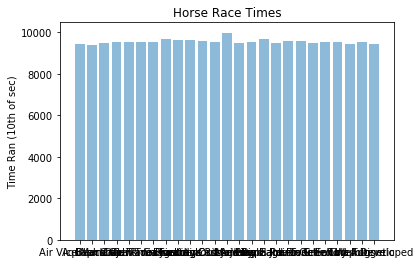

In [233]:
#objects = (finalmerged['Horse Name'])
y = finalmerged['Final_Time_Hund']
x = finalmerged['Horse Name']
 
plt.bar(x, y, align='center', alpha=0.5)
plt.ylabel('Time Ran (10th of sec)')
plt.title('Horse Race Times')
 
plt.show()

In [236]:
finalmerged['Firsts'] = finalmerged['Firsts'].astype('int')
finalmerged['Seconds'] = finalmerged['Seconds'].astype('int')
finalmerged['Thirds'] = finalmerged['Thirds'].astype('int')
finalmerged['Starts'] = finalmerged['Starts'].astype('int')

In [245]:
finalmerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 7 columns):
Final_Time         25 non-null object
Final_Time_Hund    25 non-null int64
Horse Name         25 non-null object
Firsts             25 non-null int64
Seconds            25 non-null int64
Starts             25 non-null int64
Thirds             25 non-null int64
dtypes: int64(5), object(2)
memory usage: 1.6+ KB


In [239]:
finalmerged.corr()

,Final_Time_Hund,Firsts,Seconds,Starts,Thirds
Final_Time_Hund,1.000000,-0.477118,-0.382806,-0.267308,-0.321387
Firsts,-0.477118,1.000000,0.548729,0.775012,0.346545
Seconds,-0.382806,0.548729,1.000000,0.694229,0.278409
Starts,-0.267308,0.775012,0.694229,1.000000,0.348504
Thirds,-0.321387,0.346545,0.278409,0.348504,1.000000


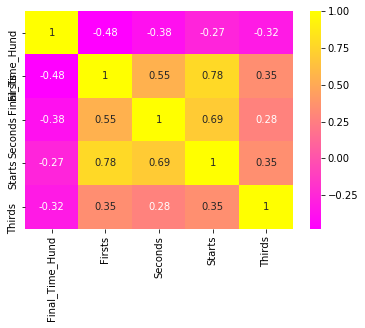

In [243]:
sns.heatmap(finalmerged.corr(), cmap = 'spring' , annot = True) 

In [278]:
pd.read_csv('stats_csv')

FileNotFoundError: File b'stats_csv' does not exist